# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [1]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [ ]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [2]:
df[(14 <= df["age"]) & (df["age"] <= 50)]["age"].mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [3]:
df[df["age"] == 16]["age"].value_counts() / df[(16 <= df["age"]) & (df["age"] <= 26)]["age"].sum()

16.0    0.006237
Name: age, dtype: float64

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [4]:
df[(df["age"] == 28) | (df["age"] == 30)]["age"].value_counts().sum()

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [5]:
df[(18 <= df["age"]) & (df["age"] <= 30)]["age"].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [6]:
df["label"].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [7]:
import re
from razdel import sentenize, tokenize
from tqdm.auto import tqdm
tqdm.pandas()

In [8]:
def count_sentences(text):
    return len(list(sentenize(text)))

In [10]:
df["n_sent"] = df["text"].progress_apply(count_sentences)

In [11]:
df.head()

,text,label,age,n_sent
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [12]:
from nltk.corpus import stopwords

In [13]:
stops = stopwords.words('russian')
print(stops)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [14]:
def tokenizer(text):
    if text == " ":
        return ""
    tokens = [_.text for _ in list(tokenize(text.lower())) if _.text not in stops and not re.search('[^а-яА-ЯёЁ]', _.text)]
    return " ".join(tokens)

In [15]:
df["tokens"] = df["text"].progress_apply(tokenizer)

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [16]:
def count_tokens(tokens):
    return len(tokens.split(" "))

In [17]:
df["n_tokens"] = df["tokens"].apply(count_tokens)
df.head()

,text,label,age,n_sent,tokens,n_tokens
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,добрым романтиком который стремился помочь все...,152
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,здраствуйте каждый день просыпаюсь мыслью живу...,64
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,проблемы девушкой каждую ссору могу перенести ...,43
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,вся жизнь это сплошной ад котором горю постоян...,24
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,хочу уснуть проснуться каждый день одно какое ...,194


In [18]:
df["n_tokens"].mean()

96.3350770624151

In [20]:
df.groupby("label")["n_tokens"].mean()

label
0    124.921957
1     67.745518
Name: n_tokens, dtype: float64

4. Напишите функцию, которая переводит текст в последовательность лемм.

In [21]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [22]:
def lemmatizer(tokens):
    lem_text = []
    for word in tokens.split(" "):
        lem_text.append(morph.parse(word)[0].normal_form)
    return ' '.join(lem_text)

In [24]:
df["lemm"] = df["tokens"].progress_apply(lemmatizer)

In [25]:
df.to_csv('lemmatized.tsv', sep='\t')

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [46]:
def pos_tag(tokens):
    pos_text = []
    for word in tokens.split(" "):
        pos_text.append(morph.parse(word)[0].tag.POS)
    return [pos if pos is not None else "None" for pos in pos_text ]

In [49]:
df["POS"] = df["tokens"].progress_apply(pos_tag)

In [50]:
df.to_csv('pos_tagged.tsv', sep='\t')

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

In [ ]:
# your code and output here

### Часть 3: Визуализация (1 балл)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [58]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

1. Визуализируйте распределение количество предложений / текст.

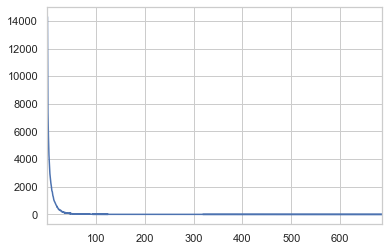

In [87]:
df["n_sent"].value_counts().plot()

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

In [56]:
def plot_len_dist(df, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    for i, label in enumerate(list(df["label"].unique())):
        label_subset = df[df["label"] == label][col_name]

        sns.distplot(label_subset, bins=20, color="blue", ax=axes[i])
        axes[i].axvline(
            (label_subset).mean(), color="k", linestyle="dashed", linewidth=1, label="mean"
        )
        axes[i].axvline(
            (label_subset).median(), color="r", linestyle="dashed", linewidth=1, label="median"
        )
        axes[i].legend()
        axes[i].set(title="%s: %s column values" % (label, col_name))
    
    fig.tight_layout()

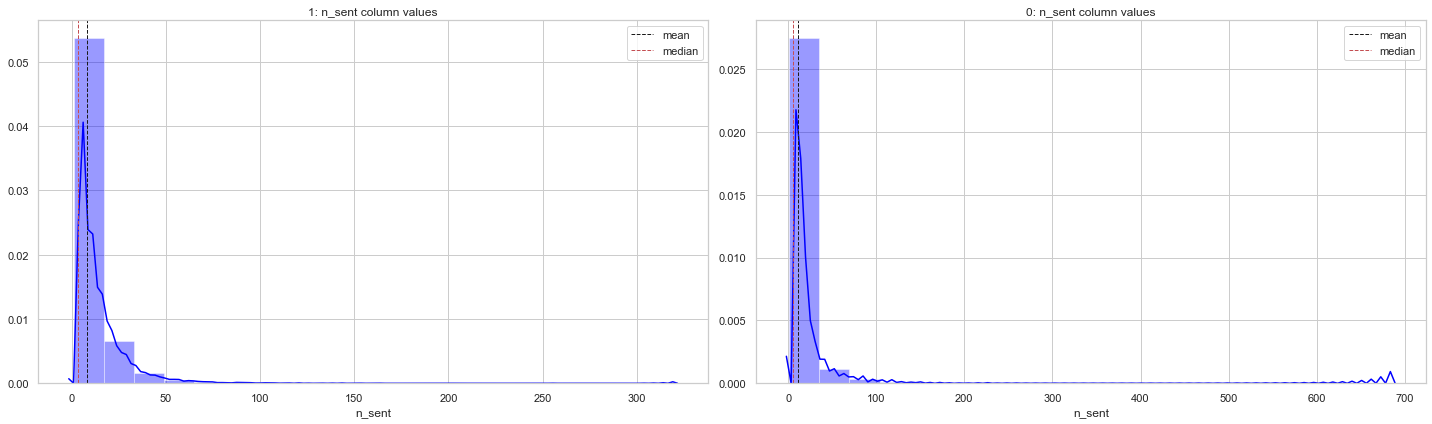

In [57]:
plot_len_dist(df, "n_sent")

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [94]:
corr_df = df[(16 <= df["age"]) & (df["age"] <= 32)][["age", "n_sent"]].corr()
corr_df

,age,n_sent
age,1.000000,0.039831
n_sent,0.039831,1.000000


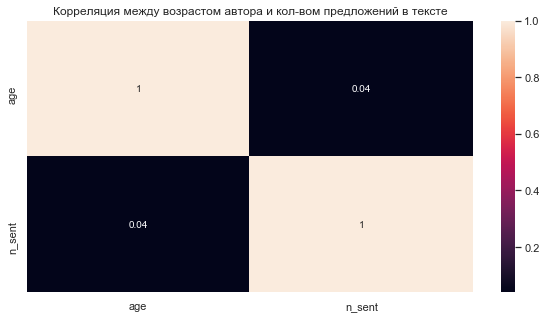

In [95]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    data=corr_df, 
    annot=True,
    ax=ax
)

plt.title("Корреляция между возрастом автора и кол-вом предложений в тексте")
plt.show()

корреляции практически нет

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [ ]:
# your code and output here

In [ ]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [ ]:
# your code and output here

In [ ]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [ ]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [ ]:
# your code and output here

In [ ]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [ ]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'],
 ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [ ]:
# your code and output here

In [ ]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [ ]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [ ]:
# your code and output here

In [ ]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [ ]:
# your code and output here

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

In [ ]:
# your answer text here